In [1]:
import os, os.path
import numpy
from galpy.df import impulse_deltav_plummer, impulse_deltav_plummerstream
import seaborn as sns
from galpy.util import bovy_plot, bovy_conversion
from stream2_util import R0, V0
from matplotlib import pyplot
from matplotlib.ticker import NullFormatter
nullfmt= NullFormatter()
%pylab inline
save_figures= False

Populating the interactive namespace from numpy and matplotlib


## Simple analytic calculations of stream-stream interactions

In [2]:
# Setup
GM=10.**-2./bovy_conversion.mass_in_1010msol(V0,R0)
rs= 0.625/R0
b= rs
stream_phi= numpy.linspace(-numpy.pi/2.,numpy.pi/2.,201)
stream_r= 10./R0
stream_v= 220./V0
x_gc= stream_r*stream_phi
v_gc= numpy.tile([0.000001,stream_v,0.000001],(201,1))
w= numpy.array([0.,132.,176])/V0
wmag= numpy.sqrt(numpy.sum(w**2.))

In [3]:
deltav_curved_r = impulse_deltav_plummer(v_gc,x_gc,-b,w,GM,rs)

In [4]:
dt= 2./wmag/V0*bovy_conversion.freq_in_kmskpc(V0,R0)
deltav_curved_stream_r_1kpc = impulse_deltav_plummerstream(v_gc,x_gc,-b,w,
                                                                               lambda t: GM/dt,rs,-dt/2.,dt/2.)
dt= 4./wmag/V0*bovy_conversion.freq_in_kmskpc(V0,R0)
deltav_curved_stream_r_2kpc = impulse_deltav_plummerstream(v_gc,x_gc,-b,w,
                                                                               lambda t: GM/dt,rs,-dt/2.,dt/2.)
dt= 10./wmag/V0*bovy_conversion.freq_in_kmskpc(V0,R0)
deltav_curved_stream_r_5kpc = impulse_deltav_plummerstream(v_gc,x_gc,-b,w,
                                                                               lambda t: GM/dt,rs,-dt/2.,dt/2.)
dt= 40./wmag/V0*bovy_conversion.freq_in_kmskpc(V0,R0)
deltav_curved_stream_r_20kpc = impulse_deltav_plummerstream(v_gc,x_gc,-b,w,
                                                                               lambda t: GM/dt,rs,-dt/2.,dt/2.)

In [5]:
deltav_curved_streamplus_r = impulse_deltav_plummer(v_gc,x_gc,-b,w,GM/2.,rs)\
    +deltav_curved_stream_r_2kpc/2.

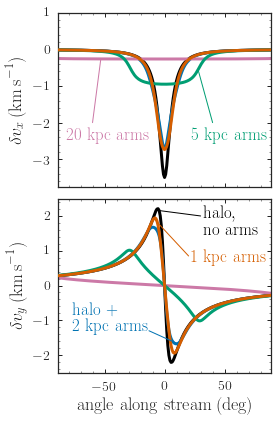

In [6]:
bovy_plot.bovy_print(axes_labelsize=18.,xtick_labelsize=14.,ytick_labelsize=14.)
figsize(4,6)
subplot(2,1,1)
bovy_plot.bovy_plot(stream_phi/numpy.pi*180.,
                    deltav_curved_r[:,0]*V0,
                    color='k',lw=3.,
                    xrange=[-89.,89.],
                    yrange=[-3.75,1.],
                    gcf=True,zorder=0,
#                    xlabel=r'$\mathrm{angle\ along\ stream\,(deg)}$',
                    ylabel=r'$\delta v_x\,(\mathrm{km\,s}^{-1})$')
#bovy_plot.bovy_text(r'$v_x$',top_left=True,size=17.)
plot(stream_phi/numpy.pi*180.,deltav_curved_stream_r_1kpc[:,0]*V0,
     color=sns.color_palette("colorblind")[2],zorder=4,lw=3.)
plot(stream_phi/numpy.pi*180.,deltav_curved_stream_r_5kpc[:,0]*V0,
     color=sns.color_palette("colorblind")[1],zorder=3,lw=3.)
plot(stream_phi/numpy.pi*180.,deltav_curved_stream_r_20kpc[:,0]*V0,
     color=sns.color_palette("colorblind")[3],zorder=2,lw=3.)
plot(stream_phi/numpy.pi*180.,deltav_curved_streamplus_r[:,0]*V0,
     color=sns.color_palette("colorblind")[0],zorder=1,lw=3.)
# label
plot([stream_phi[41]/numpy.pi*180.,-60.],[deltav_curved_stream_r_20kpc[41,0]*V0,-2.],
    lw=1.,color=sns.color_palette("colorblind")[3],zorder=0)
bovy_plot.bovy_text(-82.,-2.5,r'$\mathrm{20\ kpc\ arms}$',
                   size=17.,color=sns.color_palette("colorblind")[3])
plot([stream_phi[131]/numpy.pi*180.,40.],[deltav_curved_stream_r_5kpc[131,0]*V0,-2.],
    lw=1.,color=sns.color_palette("colorblind")[1],zorder=0)
bovy_plot.bovy_text(22.,-2.5,r'$\mathrm{5\ kpc\ arms}$',
                   size=17.,color=sns.color_palette("colorblind")[1])
pyplot.gca().xaxis.set_major_formatter(nullfmt)
subplot(2,1,2)
bovy_plot.bovy_plot(stream_phi/numpy.pi*180.,
                    deltav_curved_r[:,1]*V0,
                    color='k',lw=3.,
                    xrange=[-89.,89.],
                    yrange=[-2.5,2.5],
                    gcf=True,zorder=0,
                    xlabel=r'$\mathrm{angle\ along\ stream\,(deg)}$',
                    ylabel=r'$\delta v_y\,(\mathrm{km\,s}^{-1})$')
#bovy_plot.bovy_text(r'$v_y$',top_left=True,size=17.)
plot(stream_phi/numpy.pi*180.,deltav_curved_stream_r_1kpc[:,1]*V0,
     color=sns.color_palette("colorblind")[2],zorder=4,lw=3.)
plot(stream_phi/numpy.pi*180.,deltav_curved_stream_r_5kpc[:,1]*V0,
     color=sns.color_palette("colorblind")[1],zorder=3,lw=3.)
plot(stream_phi/numpy.pi*180.,deltav_curved_stream_r_20kpc[:,1]*V0,
     color=sns.color_palette("colorblind")[3],zorder=2,lw=3.)
plot(stream_phi/numpy.pi*180.,deltav_curved_streamplus_r[:,1]*V0,
     color=sns.color_palette("colorblind")[0],zorder=1,lw=3.)
# label
plot([stream_phi[95]/numpy.pi*180.,30.],[deltav_curved_r[95,1]*V0,2.],
    lw=1.,color='k',zorder=0)
bovy_plot.bovy_text(32.,1.45,r'$\mathrm{halo},$'+'\n'+r'$\mathrm{no\ arms}$',
                   size=17.,color='k')
plot([stream_phi[90]/numpy.pi*180.,20.],[deltav_curved_stream_r_1kpc[90,1]*V0,.85],
    lw=1.,color=sns.color_palette("colorblind")[2],zorder=1)
bovy_plot.bovy_text(22.,0.65,r'$\mathrm{1\ kpc\ arms}$',
                   size=17.,color=sns.color_palette("colorblind")[2])
plot([stream_phi[112]/numpy.pi*180.,-13.],[deltav_curved_streamplus_r[112,1]*V0,-1.3],
    lw=1.,color=sns.color_palette("colorblind")[0],zorder=5)
bovy_plot.bovy_text(-77.,-1.35,r'$\mathrm{halo}\ +$'+'\n'+r'$\mathrm{2\ kpc\ arms}$',
                   size=17.,color=sns.color_palette("colorblind")[0])
tight_layout()
if save_figures:
    bovy_plot.bovy_end_print(os.path.join(os.getenv('PAPERSDIR'),'2015-stream-stream','fig1.pdf'))